EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 1: Python Setup
## Due October 8, 2023 by 11:59 PM
### <span style="color: red">HARESH INDRAJIT</span>

Copyright &copy; 2023, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score.

### 1. Complex Numbers
Write a function `rand_complex(n)` that returns a list of `n` random complex numbers uniformly distributed in the unit circle (i.e., the magnitudes of the numbers are all between 0 and 1). Give the function a docstring. Demonstrate the function by making a list of 25 complex numbers.

## Problem 1 Solution's Approach:

<b>Note: Google's Bard was used to generate Markdown code for math equations.</b><br>
<b>Note: Used Math StackExchange to learn about the usage of Euler's identity to represent complex numbers.</b>

<i>1. Firstly, generate a random complex number with magnitude between 0 and 1 using <b>random</b> module.</i> <br>
<i>2. Secondly, move by $2 * \pi / 25$ along the arc of the circle in the clockwise direction and find a new complex number there.</i><br>
<i>3. Step 2 is followed until n complex numbers are found equally spaced along the unit circle.</i><br>
<i>4. This is going to give complex numbers who general form is $e^{i\theta} = \cos(\theta) + i\sin(\theta)$ spread uniformly on the unit circle.</i><br>
<i>5. A separate function is used called after each rendition of a complex number to make sure that the complex number's magnitude is between 0 and 1.</i><br>
<i>6. Plot it on the unit circle using matplotlib to visualise the results.</i>

In [12]:
import random # To generate pseudo-random real and imaginary parts of the complex number!
import math # For the calculation of the absolute value of the complex number
import fractions # To generate possible values of magnitude of complex numbers
import numpy as np # To hold complex numbers to plot on unit circle

pi = 3.14 # Since, random.randrange() in-built function is utilised, I have made the design choice of terminating the value of pi to 3.14

class complex_num():
    def __init__(self):
        """
        args:
            theta - Randomly generated integer denoting the angle the complex number makes with the x-axis of the Argand plane.
        """
        self.theta = random.uniform(0, pi*2)
        self.r = random.random()


    def new_com_num(self,theta,n):
        """
        args:
            theta          - Angle made by the preceding complex number with the x-axis of the Argand plane.
            n              - Desired number of complex numbers
        Returns:
            new_com_num    - Following complex number in the anti-clockwise direction
            new theta      - Updated angle
        """
        self.r = random.random()
        return [[self.r*math.cos(theta + 2*pi/n), self.r*math.sin(theta + 2*pi/n)], theta + 2*pi/n]
    
    def mag_check(self,com_num): # Redundant functionality, because the roots of unity in the form of Euler's identity has been utilised already!
        """
        args:
            num - Complex number whose value should be ensured to be between 0 and 1
        Returns:
            Boolean - True (When num's magnitude is within range), False (When num's magnitude is out of range)
        """

        #Generating all rational numbers between 0 and 1, to make sure the value of the generated complex number gets covered in it!        

        if(0<math.sqrt(math.pow(com_num[0][0],2) + math.pow(com_num[0][1],2))<1):
            return True # Signifies that the complex number fed to the function is the desired one!
        return False # Defaults to undesired complex number

def rand_complex(n):
        """
        args:
            n - Number of complex numbers that are needed to be generated
        
        Returns:
            list - List of n complex numbers with the desired specifications.   
        """

        #Angle between equally spaced complex numbers on the unit circle!
        
        complex_numbers_list = []

        utility_obj = complex_num()
        initial_theta = utility_obj.theta
        com_num = [utility_obj.r*math.cos(initial_theta), utility_obj.r*math.sin(initial_theta)]
        empty_list = []
        empty_list.append(com_num)
        empty_list.append(initial_theta)
        while(utility_obj.mag_check(empty_list)==False): # loop has to run as long as complex number has value beyond 1.
            utility_obj = complex_num()
            initial_theta = utility_obj.theta
            com_num = [math.cos(initial_theta), math.sin(initial_theta)]
            empty_list = []
            empty_list.append(com_num)
            empty_list.append(initial_theta)
        
        complex_numbers_list.append(empty_list)

        counter = 0
        new_theta = initial_theta
        for i in range(n-1):
            if(counter==0):
                ss_com_num=utility_obj.new_com_num(new_theta, n)
                while(utility_obj.mag_check(ss_com_num)==False):
                    ss_com_num=utility_obj.new_com_num(new_theta, n)
                complex_numbers_list.append(ss_com_num)
                counter+=1
            else:
                ss_com_num=utility_obj.new_com_num(new_theta, n)
                while(utility_obj.mag_check(ss_com_num)==False):
                    ss_com_num=utility_obj.new_com_num(new_theta, n)
                complex_numbers_list.append(ss_com_num)
            new_theta=utility_obj.new_com_num(utility_obj.theta, n)[1] # Switching to the new complex number to move anti-clockwise on the unit circle!
            utility_obj.theta = new_theta
                
        #For plotting on the circle!
        circle_points = []
        for i in range(n):
            circle_points.append(complex(complex_numbers_list[i][0][0],complex_numbers_list[i][0][1]))
        circle_points = np.array(circle_points) # List to numpy array typecasting!
        
        return circle_points #End result, used to plot them on the circle as well!

The generated complex numbers are: 


1 . (-0.04965979808862409+0.2452750744818373j)


2 . (-0.05266662275707458+0.1087600116118307j)


3 . (-0.33786022491116574+0.39936353869608854j)


4 . (-0.07500692598392372+0.05325774977627668j)


5 . (-0.29305026989607247+0.11239458585909076j)


6 . (-0.6371975994573008+0.07362248917028931j)


7 . (-0.25999742155885613-0.035624042736425526j)


8 . (-0.8692387064831865-0.35463434109724334j)


9 . (-0.40107644402768017-0.2977278379485872j)


10 . (-0.06293634767295979-0.07766449370470986j)


11 . (-0.10473787012163334-0.2284797520866203j)


12 . (-0.020768156630254705-0.11502605960525063j)


13 . (0.01561538084930472-0.21479098774753266j)


14 . (0.2753215885886211-0.8204309891653976j)


15 . (0.35057646928294317-0.5410074785785018j)


16 . (0.5257516321736625-0.48453484839568695j)


17 . (0.6366415089932749-0.34238191874979357j)


18 . (0.05534586604534648-0.013674569121308346j)


19 . (0.8153021522133357+0.007318633882750814j)


20 . (0.779723778

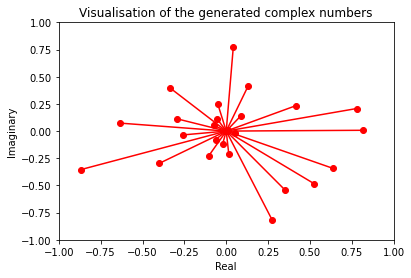

In [13]:
#Printing the complex number generated!
result = rand_complex(25)
print("The generated complex numbers are: ")
for i,com_num in enumerate(result):
    print("\n")
    print(i+1,".",com_num)

#Plotting the complex numbers on a circle!
import matplotlib.pyplot as plt
for x in range(len(result)):
    plt.plot([0,result[x].real],[0,result[x].imag],'ro-',label='python')
limit=np.max(np.ceil(np.absolute(result))) # set limits for axis
plt.title("Visualisation of the generated complex numbers")
plt.xlim((-limit,limit))
plt.ylim((-limit,limit))
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

### 2. Hashes
Write a function `to_hash(L) `that takes a list of complex numbers `L` and returns an array of hashes of equal length, where each hash is of the form `{ "re": a, "im": b }`. Give the function a docstring and test it by converting a list of 25 numbers generated by your `rand_complex` function.

## Problem 2 Solution's Approach:


<i>1. Call rand_complex() and obtain complex numbers whose real and imaginary parts need to be obtained.</i><br>
<i>2. For an object C of type <b>complex</b>, use attributes C.real and C.imag to access the real and imaginary parts of the complex number.</i><br>
<i>3. Populate the hash with the keys as the string "re" with value as C.real and for key "im" with value as C.imag. </i><br>
<i>4. Iterate Steps 1-3 for all complex numbers that were generated and append them to the array. </i><br>
<i>5. Print the array. </i>

In [14]:
def to_hash(L):
    """
    to_hash() returns a list of hashes where each hash has the real and imaginary part of the complex number in it!

    args:
        L  - Number of complex numbers whose real an 
    Returns:
        list_of_hashes - Array of hashes
    """
    com_nums = rand_complex(L)
    list_of_hashes = []
    for com_num in com_nums:
        list_of_hashes.append({"re":com_num.real, "im":com_num.imag})
    return list_of_hashes

In [15]:
#Testing the function to_hash(L)
print("Array of hashes:",to_hash(25))

Array of hashes: [{'re': -0.06483252772473196, 'im': -0.41510977303344465}, {'re': 0.04772207098561348, 'im': -0.4941784566134029}, {'re': 0.2299459812378215, 'im': -0.6349222423043267}, {'re': 0.10558664224034799, 'im': -0.15477689789277188}, {'re': 0.1835429634698666, 'im': -0.16128070046584814}, {'re': 0.3030487975801208, 'im': -0.15383413878350477}, {'re': 0.961988671594996, 'im': -0.21363130842174646}, {'re': 0.5990426374775046, 'im': 0.019579881604838027}, {'re': 0.47511743420640445, 'im': 0.1386169288156879}, {'re': 0.6930504595935297, 'im': 0.41080762060956466}, {'re': 0.003643757594284733, 'im': 0.003650143357421642}, {'re': 0.3808236205642798, 'im': 0.6450383948895821}, {'re': 0.22968783509939383, 'im': 0.792426178562907}, {'re': 0.02262220718045309, 'im': 0.7313403441627964}, {'re': -0.1410947531752058, 'im': 0.6301386781394226}, {'re': -0.15562062666390353, 'im': 0.3052427338390876}, {'re': -0.46613124524601574, 'im': 0.5286037980693863}, {'re': -0.5432562066072658, 'im': 0

### 3. Matrices

Write a function `lower_traingular(n)` that returns an $n \times n$ numpy matrix with zeros on the upper diagonal, and ones on the diagonal and lower diagonal. For example, `lower_triangular(3)` would return

```python
array([[1, 0, 0],
       [1, 1, 0],
       [1, 1, 1]])
```

## Problem 3 Solution's Approach:

<i>1. Accept the value n, through call by value. Intialise a n x n numpy matrix of zeros.</i><br>
<i>2. Initialise a counter with the value 0.</i><br>
<i>3. Run a <b>for loop</b>, increment the counter by one in each iteration.</i><br>
<i>4. Each iteration corresponds to running through each row of the numpy matrix.</i><br>
<i>5. Fill the row with <b>counter+1</b> number of 1s from the index 0 of the row.</i><br>
<i>6. Do steps 3-5 until the counter reaches the value n.</i><br>
<i>7. Print the n x n matrix.</i>

In [16]:
import numpy as np
def lower_triangular(n):
    """
    args:
        n - Number of rows/columns in the matrix
    Returns:
        array - Square numpy array
    """
    array = np.zeros((n,n))
    counter = 0
    for i in range(n):
        array[i][:counter+1] = 1
        counter += 1 
    return array

In [17]:
# Testing lower_triangular(n)
lower_triangular(3)

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 1.]])

### 4. Numpy

Write a function `convolve(M,K)` that takes an $n \times m$ matrix $M$ and a $3 \times 3$ matrix $K$ (called the kernel) and returns their convolution as in [this diagram](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYo2_VuAlQhfeEGJHva3WUlnSJLeE0ApYyjw&usqp=CAU).


Please do not use any predefined convolution functions from numpy or scipy. Write your own. If the matrix $M$ is too small, your function should return a exception.

You can read more about convolution in [this post](https://setosa.io/ev/image-kernels/).

The matrix returned will have two fewer rows and two fewer columns than $M$. Test your function by making a $100 \times 100$ matrix of zeros and ones that as an image look like the letter X and convolve it with the kernel

$$
K = \frac{1}{16} \begin{pmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{pmatrix}
$$

Use `imshow` to display both images using subplots.

## Problem 4 solution's approach!

<i>1. Accept the value for the variables $n$ (Number of rows) and $m$ (Number of columns) and initialise them with arbitrary values.</i><br>
<i>2. Allocate memory for the 3 x 3 matrix and initialise them with arbitrary values.</i><br>
<i>3. For skipping the part where manual entry of values for $n \times m$ matrix needs to be done, I've decided to use the $random()$ function. Same applies to the kernel matrix.<i></br>
<i>4. Using heuristics, the required values at specific indices of the bigger matrix will be chosen and multiplied and added on an element-wise basis to get the convolution results.</i><br>
<i>5. The required demo of the convolution is performed and visualised using Matplotlib.</i>


### Note: I used <b>Google's Bard</b> to figure out the for loop logic for multiplying and summing up the multiplicant matrix and multiplier matrix!

In [18]:
def convolution(n,m):
    """
    Function performs convolution between a n x m matrix and an 3 x 3 matrix.

    args:
        n - Number of rows
        m - Number of columns
    Returns:
        result - Result of convolution
    """
    try:
        if(n<3 or m<3):
            return Exception("Enter a reasonable value for the number of rows and columns for the multiplicant matrix!")
        mat_1 = np.random.rand(n,m)
        kernel = np.random.rand(3,3)
        result = np.zeros((n-3+1, m-3+1)) # Output shape of the convolved matrix will be (n-3+1, m-3+1)
        for i in range(n-3+1): # Number of rows
            for j in range(m-3+1): # Number of columns
                result[i][j] = np.sum(mat_1[i:i+3, j:j+3] * kernel)
        return result
    except:
        return Exception("Enter a reasonable value for the number of rows and columns for the multiplicant matrix!")

#Function for the test matrices!
def convolution_2(mat_1, mat_2):
    result = np.zeros((mat_1.shape[0]-3+1, mat_1.shape[1]-3+1)) # Output shape of the convolved matrix will be (n-3+1, n-3+1)
    for i in range(mat_1.shape[0]-3+1):
        for j in range(mat_1.shape[1]-3+1):
            result[i][j] = np.sum(mat_1[i:i+3, j:j+3] * mat_2)
    return result

In [19]:
#Testing function
large_zero_one_mat = np.zeros((100,100))
large_zero_one_mat[np.arange(100),np.arange(100)] = 1
counter=100
for i in range(100):
    large_zero_one_mat[i][counter-1]=1
    counter-=1

test_kernel = np.float16(1/16) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])

print("Result of test convolution: ")
result = convolution_2(large_zero_one_mat, test_kernel)
#print(result)
print(result)

Result of test convolution: 
[[0.375  0.25   0.0625 ... 0.0625 0.25   0.375 ]
 [0.25   0.375  0.25   ... 0.25   0.375  0.25  ]
 [0.0625 0.25   0.375  ... 0.375  0.25   0.0625]
 ...
 [0.0625 0.25   0.375  ... 0.375  0.25   0.0625]
 [0.25   0.375  0.25   ... 0.25   0.375  0.25  ]
 [0.375  0.25   0.0625 ... 0.0625 0.25   0.375 ]]


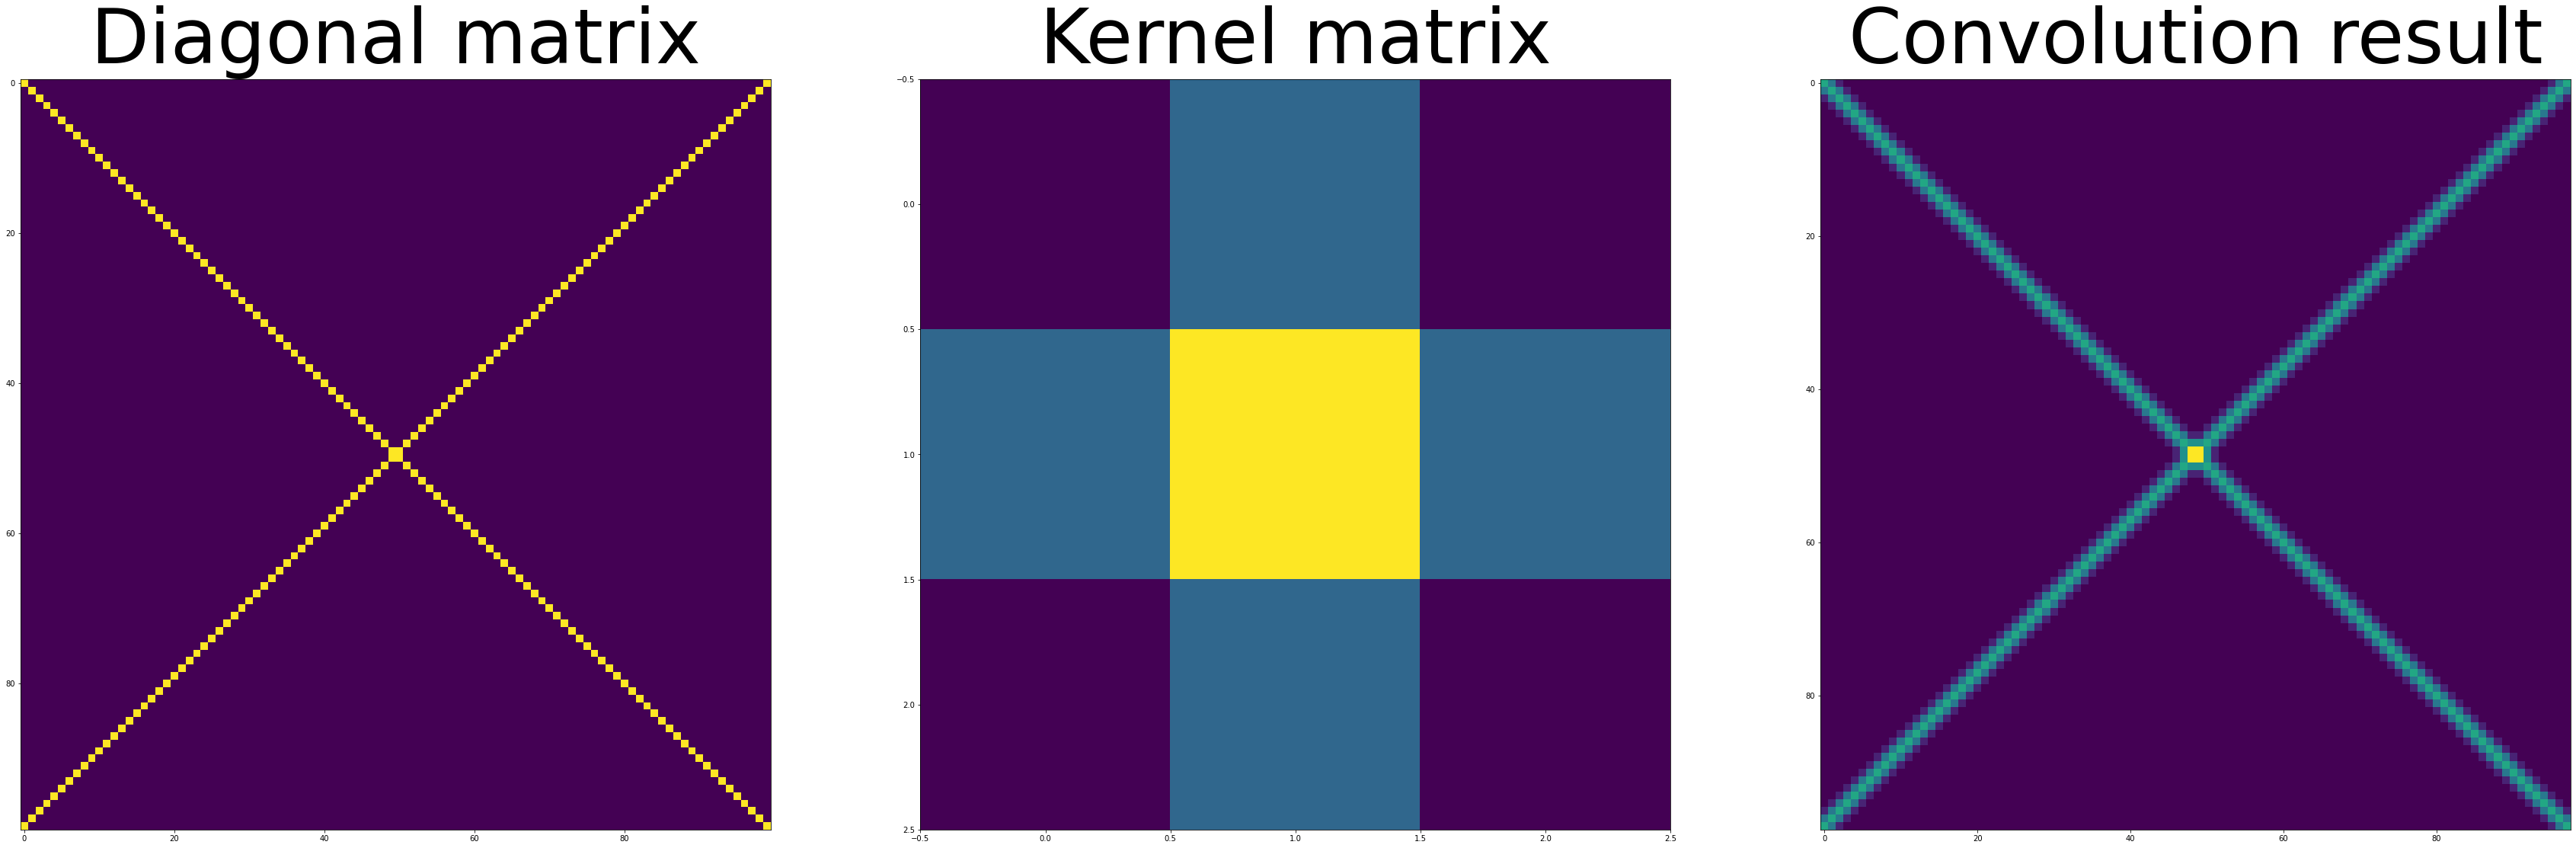

In [20]:
#Plotting test matrices and their convolution results!
fig, ax = plt.subplots(1,3,figsize=(60,60))
ax[0].set_title("Diagonal matrix",fontsize=100)
ax[0].imshow(large_zero_one_mat*100)
ax[1].set_title("Kernel matrix",fontsize=100)
ax[1].imshow(test_kernel*100)
ax[2].set_title("Convolution result",fontsize=100)
ax[2].imshow(result*100)
plt.show()

### 5. Symbolic Manipulation

Use sympy to specify and solve the following equations for $x$.

- $x^2 + 2x - 1 = 0$
- $a x^2 + bx + c = 0$

Also, evaluate the following integrals using sympy

- $\int x^2 dx$
- $\int x e^{6x} dx$
- $\int (3t+5)\cos(\frac{t}{4}) dt$

## Problem 5 Solution's Approach:

<i>1. Import sympy</i><br>
<i>2. Use sympy's inbuilt solve() function to solve the quadratic equations.</i><br>

### Solution for quadratic equations

In [21]:
from sympy import *
x= var('x')

eqn_one_sols = solve(x**2+2*x-1,x)
print("Solution of equation 1: ", eqn_one_sols)

a = symbols('a', real = True, constant = True)
b = symbols('b', real = True, constant = True)
c = symbols('c', real = True, constant = True)

eqn_two_sols = solve(a*(x**2)+b*x+c,x)
print("Solution of equation 2: ", eqn_two_sols)

Solution of equation 1:  [-1 + sqrt(2), -sqrt(2) - 1]
Solution of equation 2:  [(-b + sqrt(-4*a*c + b**2))/(2*a), -(b + sqrt(-4*a*c + b**2))/(2*a)]


### Evaluation of integrals

In [22]:
integral_1 = Integral(x**2)
expr_intg = integral_1.doit()
print("Evaluation of first integral: ", expr_intg)

intg_2 = x*exp(6*x)
integral_2 = Integral(intg_2)
expr_intg_2 = integral_2.doit()
print("Evaluation of second integral: ", expr_intg_2)

t = var('t')
intg_3 = (3*t+5)*cos(t/4)
integral_3 = Integral(intg_3)
expr_intg_3 = integral_3.doit()
print("Evaluation of second integral: ", expr_intg_3)

Evaluation of first integral:  x**3/3
Evaluation of second integral:  (6*x - 1)*exp(6*x)/36
Evaluation of second integral:  12*t*sin(t/4) + 20*sin(t/4) + 48*cos(t/4)


### 6. Typesetting

Use LaTeX to typeset the following equations.

<img src="https://www.sciencealert.com/images/Equations_web.jpg">


## Solution for Problem 6

### Used Microsoft 365 to do typset equation to LaTeX conversion!

<i> 1. Pythagoras's Theorem   -   $$ a^2+b^2=\ c^2 $$ </i><br>
<i> 2. Logarithms             -   $$ \log{xy}\ =\ \log{x\ +\ \log{y}} $$ </i><br>
<i> 3. Calculus               -   $$ \frac{df}{dt}\ =\ \lim_{h\ {\rightarrow}0}{\frac{f(t+h)\ -\ f(t)}{h}} $$ </i><br>
<i> 4. Law of Gravity         -   $$ F\ =\ G\frac{m_1m_2}{r^2} $$ </i><br>
<i> 5. The Square Root of Minus One - $$ i^2=-1 $$ </i><br>
<i> 6. Euler's Formula for Polyhedra - $$ V - E + F = 2 $$ </i><br>
<i> 7. Normal Distribution           - $$ \phi\left(x\right)=\frac{1}{\sqrt{2\pi\rho}}e^\frac{\left(x-\mu\right)^2}{2\rho^2} $$ </i><br>
<i> 8. Wave Equation                 - $$ \frac{\delta^2u}{\delta t^2}\ =\ c^2\frac{\delta^2u}{\delta x^2} $$ </i><br>
<i> 9. Fourier Transform             - $$ f\left(\omega\right)=\int_{-\infty}^{\infty}{f\left(x\right)e^{2\pi  i x\omega}dx} $$ </i><br>
<i> 10.Navier-Stokes Equation        - $$ \rho\left(\frac{\delta v}{\delta t}+v.\mathbf{\nabla}v\right) = -\mathbf{\nabla}p +\mathbf{\nabla}.\mathbf{T}+\mathbf{f} $$
<i> 11.Maxwell's Equations           - $$ \nabla.{\mathbf{E}} =\mathbf{0} $$   $$ \nabla.{\mathbf{H}} = \mathbf{0} $$ 
                                       $$ \nabla\times{\mathbf{E}}\ =\ -\frac{1}{c}\frac{\delta \mathbf{H}}{\delta t} $$
                                       $$ \nabla\times{\mathbf{H}}\ =\ -\frac{1}{c}\frac{\delta \mathbf{E}}{\delta t} $$ </i><br>
<i> 12.Second Law of Thermodynamics  - $$ dS\ \geq\ 0\  $$ </i><br>
<i> 13.Relativity                    - $$ E\ =\ mc^2 $$ </i><br>
<i> 14. Schrodinger's Equation       - $$ ih\frac{\partial}{\partial t}\psi\ =\ H\psi $$</i><br>
<i> 15. Information Theory           - $$ H\ =\ -\sum{p\left(x\right)\log{p\left(x\right)}} $$</i><br>
<i> 16. Chaos Theory                 - $$ x_{t+1}=\ kx_t(1-x_t) $$ </i><br>
<i> 17. Black-Scholes Equation       - $$ \frac{1}{2}\sigma^2S^2\frac{\delta^2V}{\delta S^2}+rS\frac{\delta V}{\delta S}+\frac{\delta V}{\delta t}-rV\ =0$$